## Implementation of multiple linear regression in Real estate price prediction problem  

### Import the necesarry libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Reading the data from csv file

In [2]:
df=pd.read_csv('Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Check if there any missing value in dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


#### so, there is no missing data-value in dataset

### Pairplot and Distplot

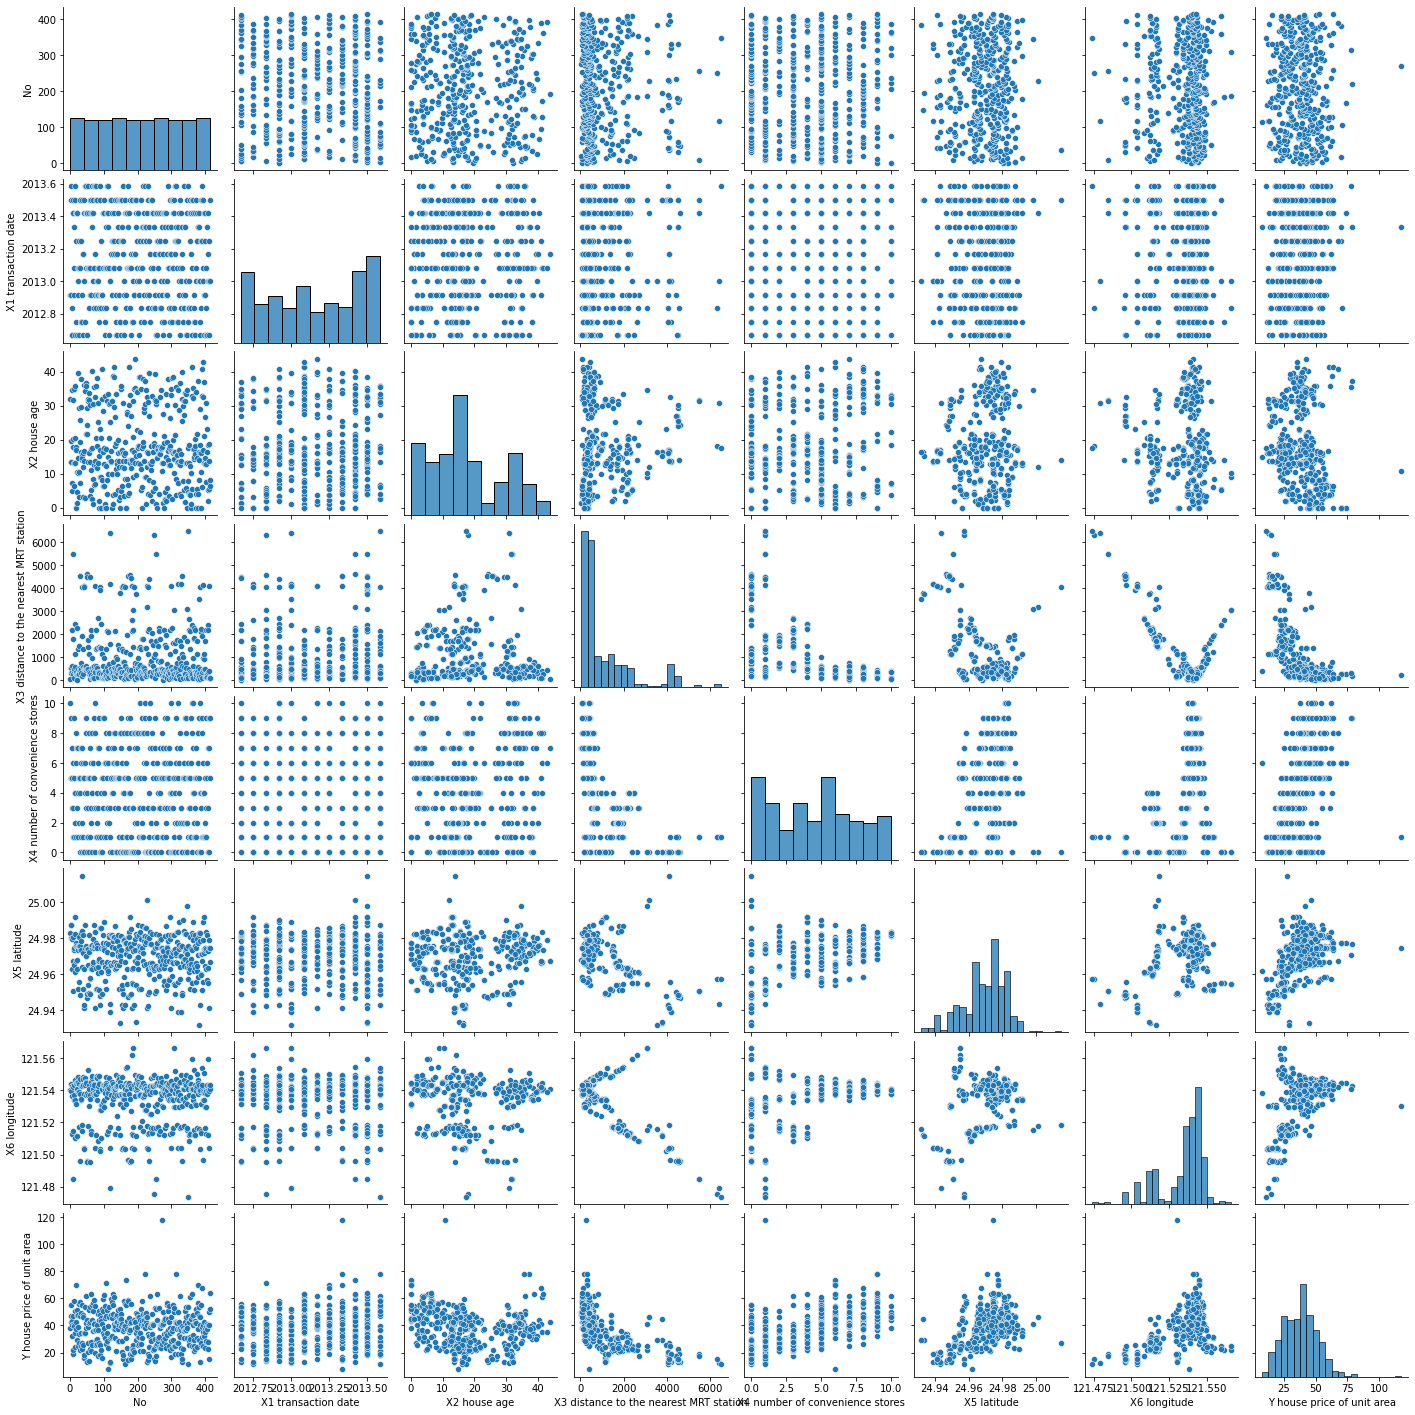

In [4]:
sns.pairplot(df)
plt.show()

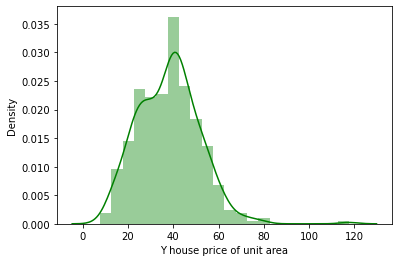

In [5]:
sns.distplot(df['Y house price of unit area'], color='green')
plt.show()

### Identifying features and label

In [6]:
x=df.drop(['Y house price of unit area', 'No'], axis=1)
y=df['Y house price of unit area']
x.head(10)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245
5,2012.667,7.1,2175.03000,3,24.96305,121.51254
6,2012.667,34.5,623.47310,7,24.97933,121.53642
7,2013.417,20.3,287.60250,6,24.98042,121.54228
8,2013.500,31.7,5512.03800,1,24.95095,121.48458
9,2013.417,17.9,1783.18000,3,24.96731,121.51486


### Split dataset to train and test data

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)
x_train.head(10)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
114,2012.667,30.6,143.83830,8,24.98155,121.54142
25,2013.083,29.3,1487.86800,2,24.97542,121.51726
99,2013.417,6.4,90.45606,9,24.97433,121.54310
90,2012.833,0.0,274.01440,1,24.97480,121.53059
230,2013.500,4.0,2147.37600,3,24.96299,121.51284
364,2013.417,35.3,614.13940,7,24.97913,121.53666
181,2013.167,11.6,201.89390,8,24.98489,121.54121
146,2012.750,0.0,185.42960,0,24.97110,121.53170
48,2013.417,24.2,4605.74900,0,24.94684,121.49578
191,2013.167,13.2,750.07040,2,24.97371,121.54951


### Train the model

In [8]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [9]:
pd.DataFrame(reg.coef_, x.columns, columns=['coefficient'])

,coefficient
X1 transaction date,4.638521
X2 house age,-0.254850
X3 distance to the nearest MRT station,-0.005068
X4 number of convenience stores,1.065967
X5 latitude,246.785307
X6 longitude,-52.648118


In [10]:
reg.intercept_

-9057.732456907428

In [11]:
df['Y house price of unit area'].value_counts()

42.5    4
40.3    4
29.3    4
40.6    4
37.4    4
       ..
55.9    1
22.9    1
21.5    1
55.1    1
63.9    1
Name: Y house price of unit area, Length: 270, dtype: int64

### Predicting test data

In [12]:
y_predict = reg.predict(x_test)
pd.DataFrame({'Test':y_test, 'Prediction':y_predict}).head(10)

,Test,Prediction
150,48.5,40.784905
269,23.0,32.208973
89,25.3,15.942830
403,39.7,45.697886
115,46.4,38.820431
310,24.7,30.733054
227,40.2,44.150564
160,57.8,47.242472
272,40.5,40.291484
349,47.0,43.798899


### Evalution of the model

In [13]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_predict, y_test)
MSE = metrics.mean_squared_error(y_predict, y_test)
RMSE = np.sqrt(MSE)

pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MAE,6.485337
MSE,72.908600
RMSE,8.538653


In [14]:
df['Y house price of unit area'].mean()

37.98019323671498

### Analyzing the residulas

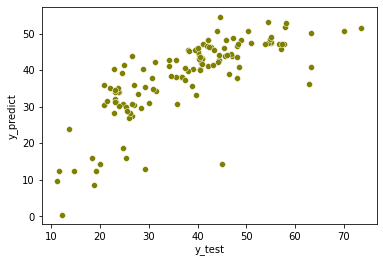

In [15]:
residuals = y_test-y_predict
sns.scatterplot(x=y_test, y=y_predict, color='olive')
plt.xlabel('y_test')
plt.ylabel('y_predict')
plt.show()


<AxesSubplot:xlabel='Y house price of unit area', ylabel='Density'>

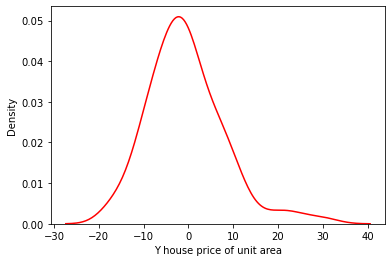

In [16]:
sns.distplot(residuals, color='r', hist=False)

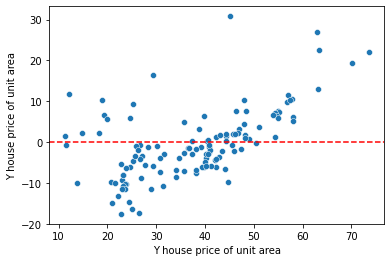

In [17]:
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='r', ls='--')

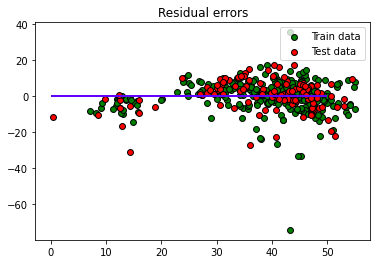

In [18]:
plt.scatter(reg.predict(x_train), reg.predict(x_train) - y_train, color = "green", s = 35, edgecolor='black', label = 'Train data')
plt.scatter(reg.predict(x_test), reg.predict(x_test) - y_test, color = "red", s = 35, edgecolor='black', label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 50, colors='#5e03fc', linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()

### Saving model into pickle file

In [19]:
import pickle

In [20]:
with open('model_pickle','wb') as f:
    pickle.dump(reg,f)

In [21]:
with open('model_pickle','rb') as f:
    mp = pickle.load(f)

In [22]:
mp.predict(x_test)

array([40.78490507, 32.20897312, 15.94283003, 45.69788631, 38.82043113,
       30.73305414, 44.15056411, 47.2424719 , 40.29148448, 43.79889936,
       45.62992727, 43.6174656 , 30.32837997, 27.34190055, 30.00083889,
       37.74204458, 51.42755419, 47.28468277, 38.0602911 , 30.71986348,
       47.69807248, 26.95964586, 43.2268588 , 12.46527516, 51.83307133,
       12.5269033 , 42.87883645, 47.40128472, 34.07668594, 28.19952122,
       31.34223393, 52.96721667, 35.24514751, 41.01879688, 41.31957906,
       30.5832955 , 28.19400037, 38.2393905 , 48.25031874, 30.66049656,
       46.37573239, 54.55707017, 44.85619617, 50.66509762, 35.89902131,
       48.88685271, 16.02960471, 40.726709  , 47.09939551, 14.29051135,
       47.00169012, 31.10949926, 33.19458289, 38.41341774,  0.50305089,
       41.97939266, 29.63668807, 36.06423183, 40.29971614, 39.28062124,
       33.34052697, 34.31295588, 28.89306085, 34.78525974, 45.56944822,
       46.46445828, 33.88073323, 50.64307189, 46.46668159, 42.97

In [23]:
x_test

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
150,2013.250,35.8,170.7311,7,24.96719,121.54269
269,2013.000,17.6,837.7233,0,24.96334,121.54767
89,2013.500,23.0,3947.9450,0,24.94783,121.50243
403,2012.667,30.9,161.9420,9,24.98353,121.53966
115,2013.083,20.6,737.9161,2,24.98092,121.54739
...,...,...,...,...,...,...
368,2013.417,18.2,350.8515,1,24.97544,121.53119
145,2012.917,2.1,451.2438,5,24.97563,121.54694
247,2013.333,21.7,1055.0670,0,24.96211,121.54928
243,2013.417,32.8,204.1705,8,24.98236,121.53923
